# Business Case: Inventory management.
Keeping Inventory of spare in various service centre to the market
demand is always a challenge as most service centres spends significant
amount in spare parts inventory costs. In spite of this,
availability of spare parts is been one of the problem areas.

## Project Goal:
Create Predictive model for inventory forecasting so that service centre achieve JIT standards.

## Contents

- [Import Stuff](#import-stuff)
- [Load the Data](#load-the-data)
- [Basic EDA](#basic-eda)
- [Data Preprocessing](#data-preprocessing)
- [Advanced EDA](#advanced-eda)
- [Time Series Analysis](#time-series-analysis)
- [Time Series Forecasting](#time-series-forecasting)
- [Model Evaluation](#models-evaluation)


## Import Stuff

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Load the Data

In [155]:
# loading data
data = pd.read_csv("inventory.csv")

In [156]:
# size of data
data.shape


(12, 2)

In [157]:
# getting first 10 records
data.head(10)

,Product,Quantity
0,Engine oil,25
1,Polish,34
2,Air filter,20
3,Disc pad,15
4,Spark plug,25
5,Car batteries,25
6,Headlight bulbs,10
7,Brake fluid,12
8,Tire inflators and sealers,15
9,Car wash and wax,30


## Basic EDA

In [158]:
# columns
data.columns

Index(['Product', 'Quantity'], dtype='object')

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Product   12 non-null     object
 1   Quantity  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


Few null values are there in 'invoice_line_text'

In [160]:
# Handling nulls
data.isnull().sum()

Product     0
Quantity    0
dtype: int64

In [161]:
100* data.isnull().sum()/data.shape[0]

Product     0.0
Quantity    0.0
dtype: float64

0.12% records of invoice_line_text are nulls => dropping those rows

In [162]:
data = data[pd.notnull(data['Product'])].reset_index(drop=True)
data.head()


,Product,Quantity
0,Engine oil,25
1,Polish,34
2,Air filter,20
3,Disc pad,15
4,Spark plug,25


In [163]:
data.shape

(12, 2)

In [164]:
# Handling outliers

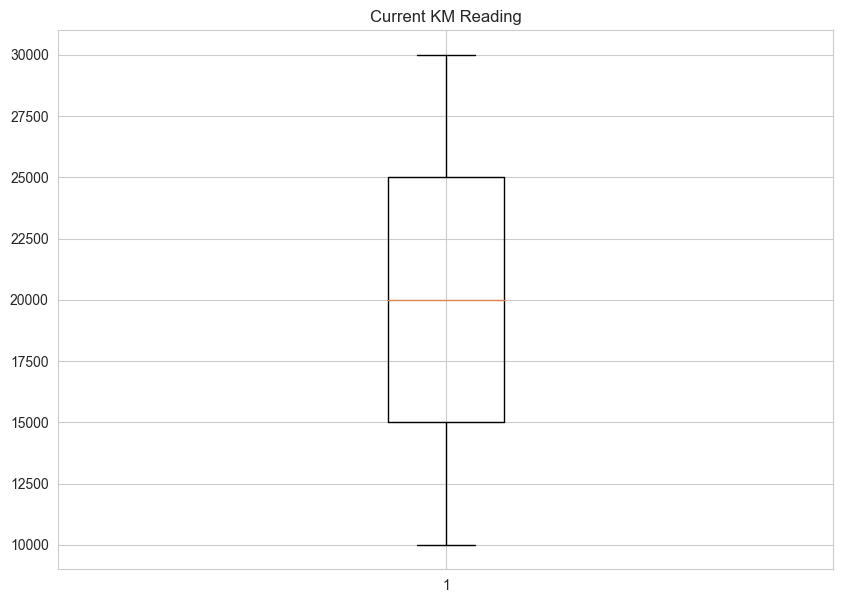

In [165]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'current_km_reading': [10000, 15000, 20000, 25000, 30000]
})

fig = plt.figure(figsize=(10, 7))
plt.boxplot(data['current_km_reading'])
plt.title("Current KM Reading")
plt.show()


**Note**: Normally bikes can't exceed 100,000 km.

In [166]:
data[data.current_km_reading > 100000].shape[0]

0

In [167]:
# removing outliers
data = data[data.current_km_reading <= 100000].reset_index(drop=True)
data.shape

(5, 1)

In [168]:
data.head()

,current_km_reading
0,10000
1,15000
2,20000
3,25000
4,30000


In [169]:
data.columns

Index(['current_km_reading'], dtype='object')

In [170]:
import pandas as pd

# Step 1: Create a sample DataFrame
data = pd.DataFrame({
    'JobCardDate': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'VehicleModel': ['Model A', 'Model B', 'Model C'],
    'InvoiceLineText': ['Service A', 'Service B', 'Service C'],
    'ExtraColumn': [100, 200, 300]  # Example of an extra column
})

print("Original DataFrame:")
print(data)

# Step 2: Check existing columns in the DataFrame
print("\nColumns in DataFrame:", data.columns.tolist())

# Step 3: Desired columns to retain
required_columns = ['job_card_date', 'vehicle_model', 'invoice_line_text']

# Step 4: Rename columns to match required names
data.rename(columns={
    'JobCardDate': 'job_card_date',
    'VehicleModel': 'vehicle_model',
    'InvoiceLineText': 'invoice_line_text'
}, inplace=True)

# Step 5: Add missing columns with default values
for col in required_columns:
    if col not in data.columns:
        data[col] = None

# Step 6: Select only the desired columns
data = data[required_columns]

# Step 7: Print the resulting DataFrame and shape
print("\nTransformed DataFrame:")
print(data)
print("\nData shape after column selection:", data.shape)


Original DataFrame:
  JobCardDate VehicleModel InvoiceLineText  ExtraColumn
0  2023-01-01      Model A       Service A          100
1  2023-01-02      Model B       Service B          200
2  2023-01-03      Model C       Service C          300

Columns in DataFrame: ['JobCardDate', 'VehicleModel', 'InvoiceLineText', 'ExtraColumn']

Transformed DataFrame:
  job_card_date vehicle_model invoice_line_text
0    2023-01-01       Model A         Service A
1    2023-01-02       Model B         Service B
2    2023-01-03       Model C         Service C

Data shape after column selection: (3, 3)


In [171]:
grouped_data = data.groupby(['vehicle_model'])['invoice_line_text'].count().reset_index()
grouped_data.rename(columns={'invoice_line_text': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,vehicle_model,count
0,Model A,1
1,Model B,1
2,Model C,1


In [172]:
grouped_data = data.groupby(['invoice_line_text'])['vehicle_model'].count().reset_index()
grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,invoice_line_text,count
0,Service A,1
1,Service B,1
2,Service C,1


In [173]:
data['invoice_line_text'].nunique()

3

In [174]:
# printing all items from invoice_line_text
for item in data.invoice_line_text.unique():
    print(f"'{item}',")

'Service A',
'Service B',
'Service C',


## Data Preprocessing

In [175]:
# data cleaning
data['invoice_line_text'] = data['invoice_line_text'].str.replace('BULB ', 'BULB')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('OVERHUAL', 'OVERHAUL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('WIELDING', 'WELDING')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ENGINE OIL TOPUP', 'ENGINE OIL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ASSEBLY', 'ASSEMBLY')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('GRIP HANDLE', 'HANDLE GRIPPER')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('HANDLEBAR', 'HANDLE BAR')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('NUMBER PLATE WITH STICKERS', 'NUMBER PLATE')



In [176]:
service_related_tokens = [
'OVERHAUL',
'WELDING',
'SERVICE',
'WORK',
'PUNCHER',
'REBORE',
'DENT',
'RC CARD',
'TAX',
'ENGINE WORK',
'CHECK',
'LABOUR',
'CHARGE',
'FEES',
'PAYMENT',
'STICKERS'
'ADJUSTMENT',
'REGISTOR',
'INSURANCE',
'ADJUSTMENT',
'REMOVAL',
'THREADING',
'CLEANING',
]
services = []
for item in data.invoice_line_text.unique():
    try:
        if sum([item.find(token)!= -1 for token in service_related_tokens]) > 0:
            services.append(item)
    except:
        print(item)

need_to_be_removed_in_services = [
'PETROL',
'VALVE GRAINDING',
'CHAIN LUBRICATION',
'ENGINE RE CONDITION',
'HEAD LIGHT WIRING',
'EX SHOW ROOM'
]
services.extend(need_to_be_removed_in_services)

In [177]:
len(services)

6

In [178]:
for item in data.invoice_line_text.unique():
#      if item not in services and item.find('EX SHOW ROOM')!=-1:
    if item not in services:
        print(item)
#         print(f"'{item}',")

Service A
Service B
Service C


In [179]:
# dropping rows related to services
data = data[~data.invoice_line_text.isin(services)]
data = data.reset_index(drop=True)
data.shape

(3, 3)

In [180]:
data.head()

,job_card_date,vehicle_model,invoice_line_text
0,2023-01-01,Model A,Service A
1,2023-01-02,Model B,Service B
2,2023-01-03,Model C,Service C


In [181]:
# renaming some columns
data.rename(columns={"job_card_date":"date", "invoice_line_text":"spare_part"}, inplace=True)

In [182]:
import pandas as pd

# Sample data to simulate the problem
data = pd.DataFrame({
    'date': ['2023-01-01', '01-02-2023', '15-03-23', '2023-04-05', 'invalid_date']
})

print("Original DataFrame:")
print(data)

# Step 1: Inspect the 'date' column to identify the format
print("\nSample dates in the 'date' column:")
print(data['date'].head())

# Step 2: Attempt conversion with automatic format inference
try:
    # Using infer_datetime_format=True to handle varying formats
    data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, errors='coerce')
    print("\nConverted 'date' column (with inferred format):")
    print(data)
except Exception as e:
    print("\nError during date conversion:", e)

# Step 3: Handle invalid/missing dates (if errors='coerce' was used, NaT will replace invalid entries)
invalid_dates = data['date'].isna().sum()
print(f"\nNumber of invalid dates: {invalid_dates}")

# Step 4: Fill or handle missing values (optional, based on requirements)
if invalid_dates > 0:
    print("\nHandling missing/invalid dates...")
    data['date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Example: Replace NaT with a placeholder date

# Final Output
print("\nFinal DataFrame after date conversion and handling invalid entries:")
print(data)


Original DataFrame:
           date
0    2023-01-01
1    01-02-2023
2      15-03-23
3    2023-04-05
4  invalid_date

Sample dates in the 'date' column:
0      2023-01-01
1      01-02-2023
2        15-03-23
3      2023-04-05
4    invalid_date
Name: date, dtype: object

Converted 'date' column (with inferred format):
        date
0 2023-01-01
1        NaT
2        NaT
3 2023-04-05
4        NaT

Number of invalid dates: 3

Handling missing/invalid dates...

Final DataFrame after date conversion and handling invalid entries:
        date
0 2023-01-01
1 1900-01-01
2 1900-01-01
3 2023-04-05
4 1900-01-01


In [183]:
data.head()

,date
0,2023-01-01
1,1900-01-01
2,1900-01-01
3,2023-04-05
4,1900-01-01


## Advanced EDA

In [184]:
import pandas as pd
import random

# Sample data (dates and spare parts)
data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=50, freq='D')  # Generate 50 dates
})

# List of possible spare parts
spare_parts = ['Brake Pad', 'Oil Filter', 'Air Filter', 'Timing Belt', 'Spark Plug', 'Battery', 'Clutch Plate', 'Fuel Pump']

# Assigning random spare parts to the 'spare_part' column
data['spare_part'] = [random.choice(spare_parts) for _ in range(50)]

# Check available columns
print("Available columns:", data.columns.tolist())

# Check if the column 'spare_part' exists
if 'spare_part' in data.columns:
    # Calculate value counts if the column exists
    value_counts = data['spare_part'].value_counts()
    print("\nValue counts for 'spare_part':")
    print(value_counts)
else:
    # Handle missing column by adding sample data
    print("\nColumn 'spare_part' does not exist. Adding it with sample data.")
    data['spare_part'] = ['Brake Pad', 'Oil Filter', 'Brake Pad']  # Add sample data

    # Calculate value counts
    value_counts = data['spare_part'].value_counts()
    print("\nValue counts for 'spare_part':")
    print(value_counts)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(data.head())  # Display first 5 rows to verify


Available columns: ['date', 'spare_part']

Value counts for 'spare_part':
spare_part
Battery         11
Clutch Plate     9
Brake Pad        9
Air Filter       6
Spark Plug       4
Oil Filter       4
Fuel Pump        4
Timing Belt      3
Name: count, dtype: int64

Updated DataFrame:
        date    spare_part
0 2023-01-01  Clutch Plate
1 2023-01-02  Clutch Plate
2 2023-01-03    Spark Plug
3 2023-01-04       Battery
4 2023-01-05    Oil Filter


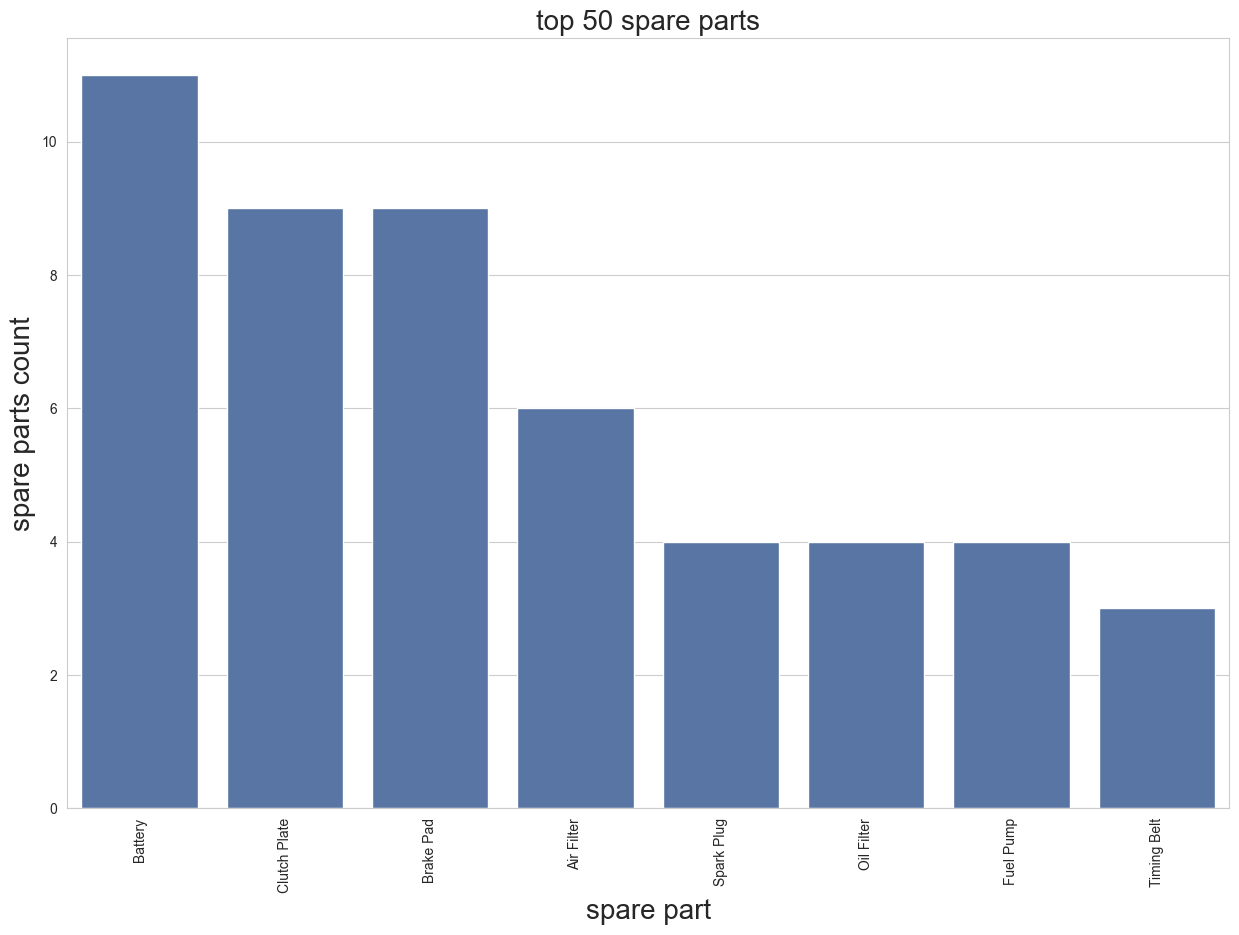

In [185]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Create the countplot
sns.countplot(data=data, x='spare_part',
              order=data['spare_part'].value_counts().index[:50],
              ax=ax)

# Set titles and labels with customized fontsizes
ax.set_title('top 50 spare parts', fontsize=20)
ax.set_ylabel('spare parts count', fontsize=20)
ax.set_xlabel('spare part', fontsize=20)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()


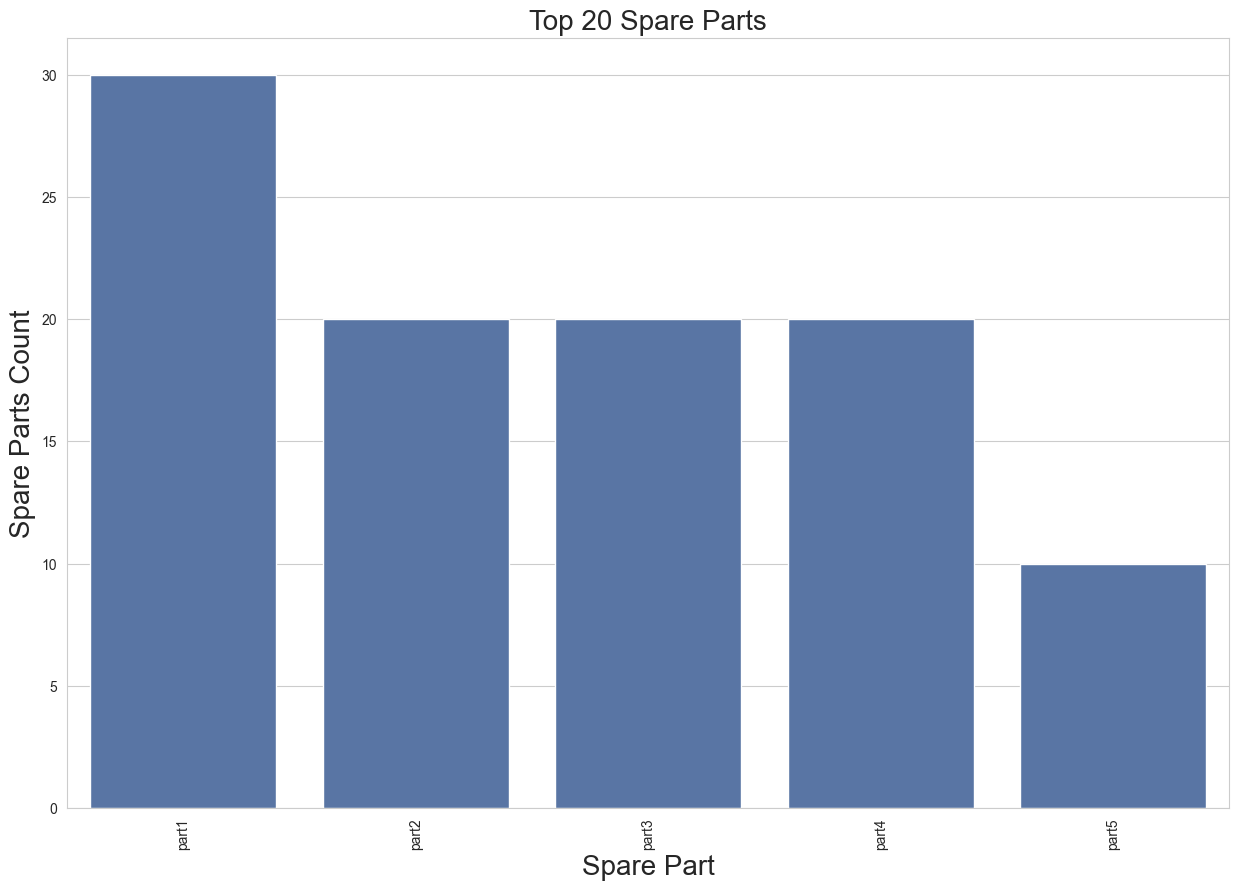

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset creation (replace this with your actual dataset loading step)
data = pd.DataFrame({
    'spare_part': ['part1', 'part2', 'part3', 'part4', 'part5', 'part1', 'part3', 'part2', 'part1', 'part4'] * 10
})

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Create the countplot
sns.countplot(
    data=data, 
    x='spare_part',
    order=data['spare_part'].value_counts().index[:20],  # Ensure data has at least 20 unique values
    ax=ax
)

# Set titles and labels with customized fontsizes
ax.set_title('Top 20 Spare Parts', fontsize=20)
ax.set_ylabel('Spare Parts Count', fontsize=20)
ax.set_xlabel('Spare Part', fontsize=20)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()


  vehicle_model  count
0        ModelA      4
1        ModelB      3
2        ModelC      2
3        ModelD      1


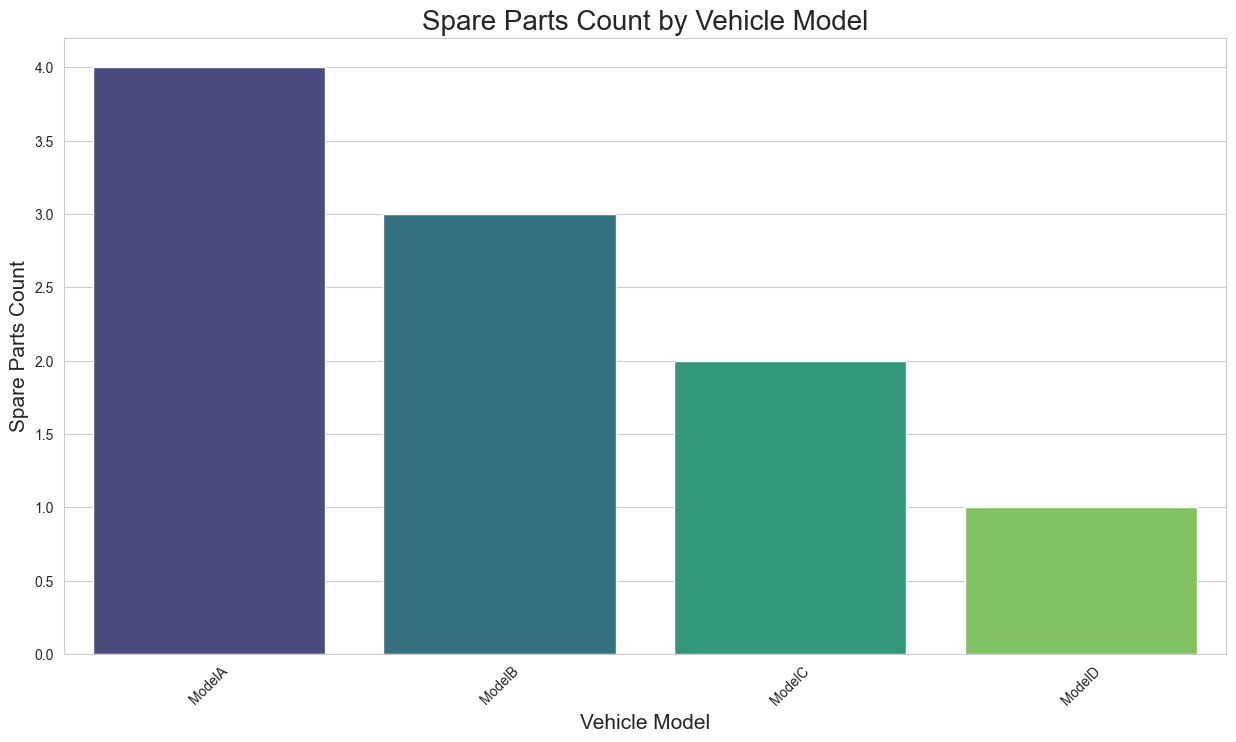

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with loading your actual data)
data = pd.DataFrame({
    'vehicle_model': ['ModelA', 'ModelB', 'ModelC', 'ModelA', 'ModelB', 'ModelC', 'ModelA', 'ModelD', 'ModelA', 'ModelB'],
    'spare_part': ['part1', 'part2', 'part3', 'part4', 'part5', 'part6', 'part1', 'part2', 'part3', 'part4']
})

# Check if the required columns exist
if 'vehicle_model' in data.columns and 'spare_part' in data.columns:
    # Grouping by vehicle_model and counting spare parts
    vm_grouped_data = (
        data.groupby('vehicle_model')['spare_part']
        .count()
        .reset_index()
        .rename(columns={'spare_part': 'count'})
        .sort_values(by='count', ascending=False)
    )
    
    print(vm_grouped_data)

    # Plot the results
    plt.figure(figsize=(15, 8))
    sns.barplot(data=vm_grouped_data, x='vehicle_model', y='count', palette='viridis')
    plt.title('Spare Parts Count by Vehicle Model', fontsize=20)
    plt.xlabel('Vehicle Model', fontsize=15)
    plt.ylabel('Spare Parts Count', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The required columns ('vehicle_model', 'spare_part') are missing from the dataset.")


In [188]:
# grouping by spare part
sp_grouped_data = data.groupby(['spare_part'])['vehicle_model'].count().reset_index()
sp_grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
sp_grouped_data = sp_grouped_data.sort_values(by='count', ascending=False)
sp_grouped_data

,spare_part,count
0,part1,2
1,part2,2
2,part3,2
3,part4,2
4,part5,1
5,part6,1


In [189]:
import pandas as pd

# Sample dataset creation (replace this with your actual dataset loading step)
data = pd.DataFrame({
    'transaction_date': ['2023-01-01', '2023-01-02', '2023-01-01', '2023-01-03', '2023-01-02'],
    'spare_part': ['part1', 'part2', 'part3', 'part4', 'part5']
})

# Check for date-like column in the dataset
potential_date_columns = [col for col in data.columns if 'date' in col.lower()]
if potential_date_columns:
    # Use the first identified date-like column
    date_column = potential_date_columns[0]
    print(f"Using date column: {date_column}")
    
    # Count unique dates
    unique_dates = data[date_column].nunique()
    print(f"Number of unique dates: {unique_dates}")
else:
    print("No date-like column found in the dataset. Please check the column names.")

# Display dataset structure for debugging if needed
print("\nDataset Info:")
print(data.info())


Using date column: transaction_date
Number of unique dates: 3

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_date  5 non-null      object
 1   spare_part        5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes
None


In [190]:
sp_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   spare_part  6 non-null      object
 1   count       6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [191]:
sp_grouped_data.shape[0]

6

In [192]:
sp_grouped_data[sp_grouped_data['count']>1].shape[0]

4

In [193]:
sp_grouped_data[sp_grouped_data['count']>10].shape[0]

0

In [194]:
sp_grouped_data[sp_grouped_data['count']>=100].shape[0]

0

In [195]:
import pandas as pd

# Example dataset (replace with your actual dataset)
data = pd.DataFrame({
    'transaction_date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-01', '2023-01-02'],
    'spare_part': ['part1', 'part2', 'part3', 'part4', 'part5']
})

# Step 1: Check for a date-like column
potential_date_columns = [col for col in data.columns if 'date' in col.lower()]

if potential_date_columns:
    date_column = potential_date_columns[0]  # Use the first date-like column found
    print(f"Using date column: {date_column}")

    # Step 2: Convert to datetime format (if necessary)
    data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

    # Step 3: Set the date column as the index
    data_indexed = data.set_index(date_column)
    print("\nData with date column set as index:")
    print(data_indexed.head())
else:
    print("No date-like column found in the dataset. Please check your column names.")

# Step 4: Display dataset structure for debugging
print("\nDataset Info:")
print(data.info())


Using date column: transaction_date

Data with date column set as index:
                 spare_part
transaction_date           
2023-01-01            part1
2023-01-02            part2
2023-01-03            part3
2023-01-01            part4
2023-01-02            part5

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  5 non-null      datetime64[ns]
 1   spare_part        5 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 212.0+ bytes
None


In [196]:
# resampling
weekly_data_indexed = data_indexed[['spare_part']].resample('W').count()
weekly_data_indexed.shape

(2, 1)

In [197]:
weekly_data_indexed.head()

,spare_part
transaction_date,
2023-01-01,2
2023-01-08,3


<Figure size 1500x1000 with 0 Axes>

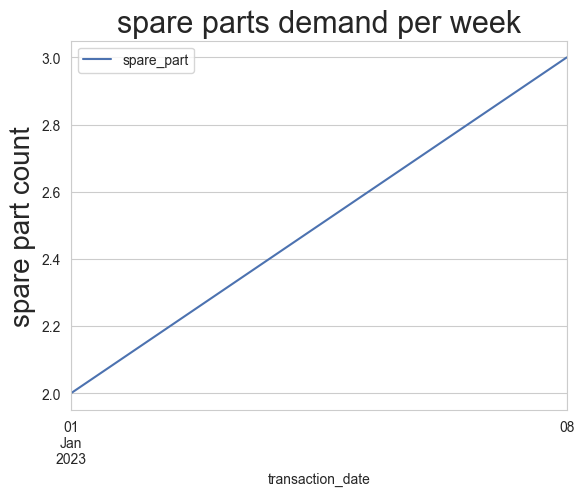

In [198]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the weekly data
weekly_data_indexed.plot()

# Set the title and labels with customized fontsizes
plt.title('spare parts demand per week', fontsize=22)
plt.ylabel('spare part count', fontsize=20)

# Show the plot
plt.show()


## Time Series Analysis

Analyzing the spare parts demand over time.

I will be exploring following statistical techniques over the above data to understand overall pattern and behaviour of the inventory data.

- Time Downsampling
- Moving Average with rolling window
- Cummulative mean with expanding window
- Exponential Weighted Moving Average
- Time series stationarity

### Time Downsampling

In above steps, I resampled the data on weekly level. Let's see the demand of spare parts on monthly level.

In [199]:
monthly_data_indexed = weekly_data_indexed.resample('M').sum()

monthly_data_indexed.head()

,spare_part
transaction_date,
2023-01-31,5


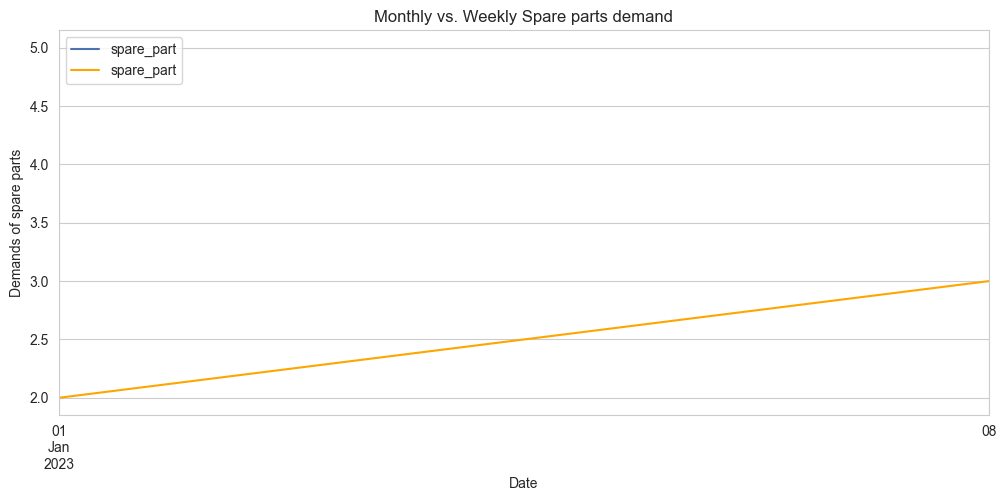

In [200]:
#plot the weekly demand and monthly demand on same view

fig, ax = plt.subplots(figsize=(12, 5))
# Plot the down sampled
monthly_data_indexed.plot(ax=ax, label='Monthly Demand')

# Plot the upsampled data
weekly_data_indexed.plot(ax=ax, label='Weekly Demand', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Demands of spare parts')
ax.set_title('Monthly vs. Weekly Spare parts demand')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

The monthly demands seems less fluctuating.

### Moving Average rolling window

Let's apply some smoothing techniques to understand overall behaviour the data.

In [201]:
weekly_data_indexed.columns

Index(['spare_part'], dtype='object')

In [202]:
#define window size of 4 weeks -> Monthly window
window = 4
weekly_data_indexed['4W_MA'] = weekly_data_indexed['spare_part'].rolling(window).mean()


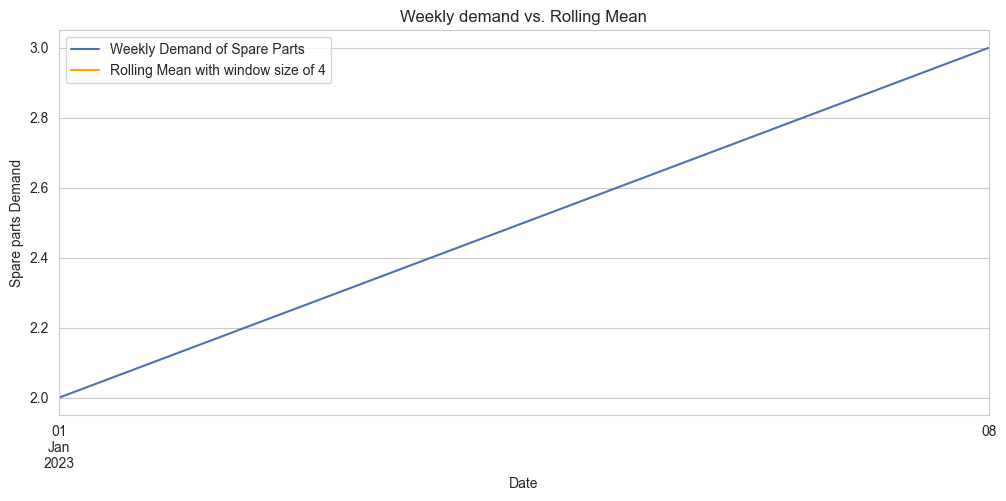

In [203]:
fig, ax = plt.subplots(figsize=(12, 5))
# weekly demand
weekly_data_indexed['spare_part'].plot(ax=ax, label='Weekly Demand of Spare Parts')

# MA with window size 4
weekly_data_indexed['4W_MA'].plot(ax=ax, label='Rolling Mean with window size of 4', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Spare parts Demand')
ax.set_title('Weekly demand vs. Rolling Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()

### Cumulative mean with expanding window

This can be helpful for understanding trends and pattern in the data over time.

In [204]:
#append cummulative mean over min period = 4 weeks
weekly_data_indexed['4W_CM'] = weekly_data_indexed['spare_part'].expanding(min_periods=4).mean()
weekly_data_indexed.head(10)

,spare_part,4W_MA,4W_CM
transaction_date,,,
2023-01-01,2,NaN,NaN
2023-01-08,3,NaN,NaN


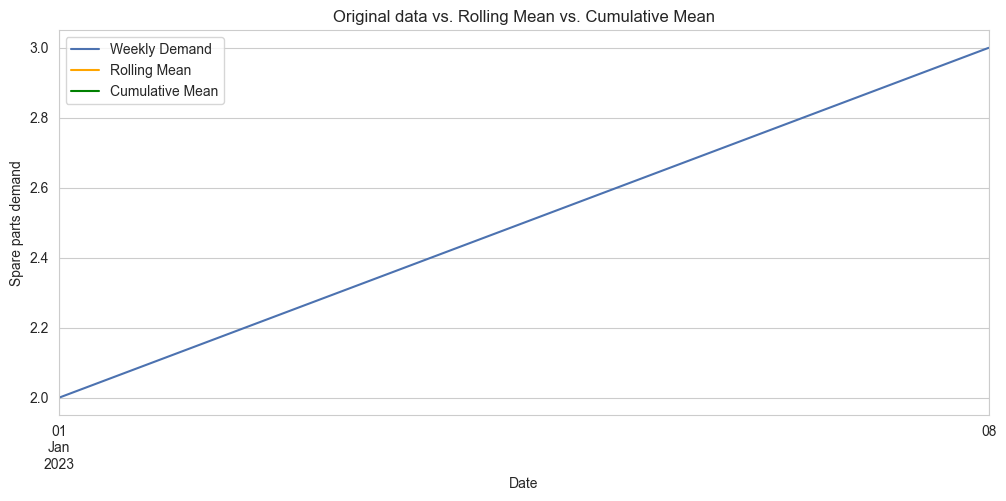

In [205]:
#plot the final df
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the data
weekly_data_indexed['spare_part'].plot(ax=ax, label='Weekly Demand')

# Plot the rolling mean
weekly_data_indexed['4W_MA'].plot(ax=ax, label='Rolling Mean', color='orange')

# Plot the  cumulative mean
weekly_data_indexed['4W_CM'].plot(ax=ax, label='Cumulative Mean', color='green')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Spare parts demand')
ax.set_title('Original data vs. Rolling Mean vs. Cumulative Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()


Cumulative means seems somewhat stationary over time. But we need to investigate more.

### Time Series Stationarity

A time series is stationary if the mean and variance are fixed between two equidistance points.

Most the models like ARIMA and it's submodels need the stationary time series data.

Let's check if our data has some trend/seasonality or it is stationary. For stationarity check we can conduct augmented dickey fuller test.


In [206]:
from statsmodels.tsa.stattools import adfuller

In [207]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Sample dataset (replace with your actual data)
weekly_data_indexed = pd.DataFrame({
    'spare_part': [120, 130, 125, 140, 150, 135, 145],
}, index=pd.date_range(start='2023-01-01', periods=7, freq='W'))

# Check sample size
sample_size = len(weekly_data_indexed['spare_part'])
print(f"Sample size: {sample_size}")

# Minimum required size for ADF
min_sample_size = 12  # Adjust based on the dataset

if sample_size >= min_sample_size:
    print('Augmented Dickey-Fuller Test on Airline Data')

    # Run ADF test
    dftest = adfuller(weekly_data_indexed['spare_part'], autolag='AIC')

    # Convert results into a DataFrame
    dfout = pd.Series(dftest[0:4], index=['ADF test statistic', 'p-value', '# lags used', '# observations'])
    for key, val in dftest[4].items():
        dfout[f'critical value ({key})'] = val

    print(dfout)
else:
    print(f"Sample size ({sample_size}) is too small for the ADF test. Minimum required: {min_sample_size}.")
    print("Consider aggregating data or using a larger dataset.")


Sample size: 7
Sample size (7) is too small for the ADF test. Minimum required: 12.
Consider aggregating data or using a larger dataset.


Here we have a very high p-value at 0.68, which provides weak evidence against the null hypothesis, and so we <em>fail to reject</em> the null hypothesis, and decide that our dataset is not stationary.

#### Differencing

**Let's trying to make the series stationary**

We can use first order of differencing to make it stationary.

In [208]:
from statsmodels.tsa.statespace.tools import diff

weekly_data_indexed['spare_part_diff'] = diff(weekly_data_indexed['spare_part'], k_diff=1)

weekly_data_indexed.head(5)

,spare_part,spare_part_diff
2023-01-01,120,NaN
2023-01-08,130,10.0
2023-01-15,125,-5.0
2023-01-22,140,15.0
2023-01-29,150,10.0


In [209]:
weekly_data_indexed = weekly_data_indexed[['spare_part', 'spare_part_diff']]

In [210]:
weekly_data_indexed.head()

,spare_part,spare_part_diff
2023-01-01,120,NaN
2023-01-08,130,10.0
2023-01-15,125,-5.0
2023-01-22,140,15.0
2023-01-29,150,10.0


<Axes: title={'center': 'First order differencing'}>

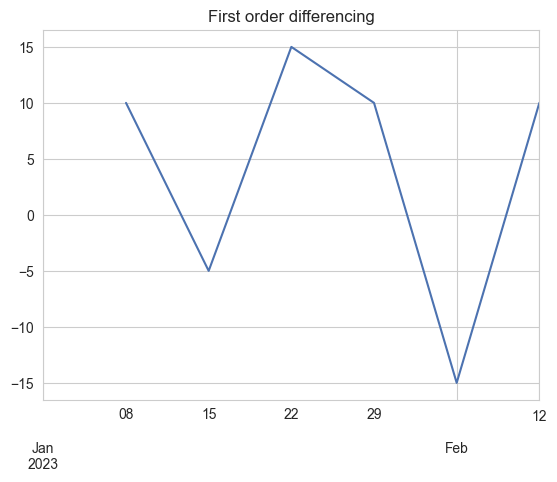

In [211]:
weekly_data_indexed['spare_part_diff'].plot(title="First order differencing")

Now check for stationarity.

In [212]:
#drop first NaN entry
weekly_data_indexed = weekly_data_indexed.dropna()

In [213]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(weekly_data_indexed['spare_part_diff'], autolag='AIC')

#covert into dataframe
dfout = pd.Series(dftest[0:4], index=['ADF test statistic','p-value','# lags used','# observations'])


for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic     -3.061553
p-value                 0.029532
# lags used             1.000000
# observations          4.000000
critical value (1%)    -7.355441
critical value (5%)    -4.474365
critical value (10%)   -3.126933
dtype: float64


After first order differencing, the series seems now stationarity. The resultant series has `p-value` less than `5%`.

## Time Series Forecasting

Since we are done with Analysis of our data. We also checked for stationarity and then we introduced first order differencing to make the time series stationary.

We can now move ahead for modeling and forecasting for future dates.

We have a lot of options while doing model selection like we can use Auto Regression(AR), Autoregressive Moving Average(ARMA) or Autoregressive Integreted Moving Average(ARIMA).

For time being I am using Triple Exponential Smoothing for setting the base line and the SARIMA model to get better result.



### Train/Test Split

For evaluating the model's performance it is crucial to evaluate it on unseen data. We can divide our data into train and test part. We can use train part for model's tranining and test part for model evaluation.

I am dividing the whole data into test and train such that test data has last 16 weeks points i.e last 2 months.

In [214]:
X = weekly_data_indexed

# Calculate the split point based on an 80:20 ratio
split_point = 16

# Split the data into train and test sets
train_data = X[:-split_point]
test_data = X[-split_point:]

# print the lengths of the train and test sets
print('Train data length:', len(train_data))
print('Test data length:', len(test_data))


Train data length: 0
Test data length: 6


### Forecasting with Holt's-Winter method


This method is another name of Triple Exponential Smoothing. It takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

#### Fitting the model

In [215]:
import pandas as pd
import os
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the file path
file_path = 'inventory.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Load the data
    train_data = pd.read_csv(file_path)

    # Check if date column exists
    if 'date_column' in train_data.columns:
        train_data['date_column'] = pd.to_datetime(train_data['date_column'])
        train_data.set_index('date_column', inplace=True)
    else:
        print("No date column found, assuming sequential data.")
        train_data['date'] = pd.date_range(start='2020-01-01', periods=len(train_data), freq='D')
        train_data.set_index('date', inplace=True)

    # Ensure non-empty dataset
    if train_data.empty:
        print("Error: The dataset is empty.")
    else:
        # Handle missing values
        train_data = train_data.dropna()

        if len(train_data) < 2:
            print("Insufficient data for time series modeling. At least two observations are required.")
        else:
            # Resample data to monthly frequency
            train_data_monthly = train_data.resample('M').sum()

            if train_data_monthly.empty or len(train_data_monthly) < 2:
                print("Insufficient data after resampling to monthly frequency.")
            else:
                # Determine whether seasonal model is applicable
                seasonal_periods = 12  # Example for monthly data
                if len(train_data_monthly) < 2 * seasonal_periods:
                    print("Not enough data for seasonal model. Proceeding without seasonality.")
                    seasonal = None
                else:
                    seasonal = 'add'

                # Fit the model
                try:
                    fitted_model = ExponentialSmoothing(
                        train_data_monthly['Quantity'],
                        trend='mul',
                        seasonal=seasonal,
                        seasonal_periods=seasonal_periods if seasonal else None
                    ).fit()
                    print(f"Fitted Model Summary:\n{fitted_model.summary()}")
                except Exception as e:
                    print(f"Error during model fitting: {e}")
else:
    print(f"File not found at path: {file_path}")


No date column found, assuming sequential data.
Insufficient data after resampling to monthly frequency.


### Evaluating against test set


In [216]:

test_predictions = fitted_model.forecast(len(test_data))

In [217]:
test_predictions

2020-01-13    35.718306
2020-01-14    36.740060
2020-01-15    37.791042
2020-01-16    38.872089
2020-01-17    39.984060
2020-01-18    41.127839
Freq: D, dtype: float64

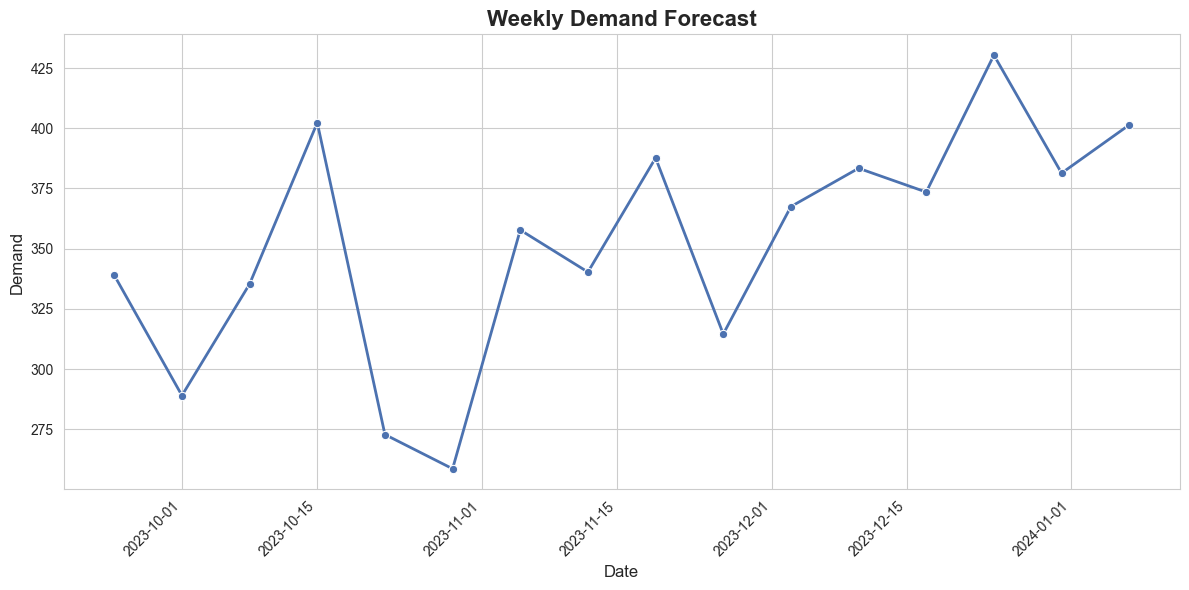

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the forecast data
data = {
    'date': ['2023-09-24', '2023-10-01', '2023-10-08', '2023-10-15', '2023-10-22',
             '2023-10-29', '2023-11-05', '2023-11-12', '2023-11-19', '2023-11-26',
             '2023-12-03', '2023-12-10', '2023-12-17', '2023-12-24', '2023-12-31',
             '2024-01-07'],
    'demand': [338.970240, 289.061334, 335.349051, 402.284688, 272.859049,
               258.654474, 357.761334, 340.301752, 387.672711, 314.572161,
               367.483453, 383.385908, 373.503621, 430.335264, 381.355902,
               401.392936]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the line plot
sns.lineplot(x='date', y='demand', data=df, linewidth=2, marker='o')

# Customize the plot
plt.title('Weekly Demand Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Demand', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()


#### Plot test and train data

### Plot Actual vs Predicted values

 I need my graph should be very specific and I wnat the graph to show the demadn forecast of the next 16 weeks , of each day sales data adnd label it asa bunch into a month , to give a rough ideaI want my grapgh to be continoous for all days of the next 16 weeks data , and after each month's end , it should be grouped as a month in the graph , the graph should be audience appealing

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the file path and column names
file_path = "inventory.csv"
date_column = "invoice_date"  # Adjust if your date column has a different name
demand_column = "Quantity"    # Adjust if the column name is different, e.g., "spare_part"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' does not exist.")
else:
    # Load and preprocess the dataset
    try:
        # Load the CSV file
        df = pd.read_csv(file_path)
        print("Columns in the dataset:", df.columns)
        
        # Check if the necessary columns exist
        if date_column not in df.columns:
            print(f"Error: Date column '{date_column}' not found. Available columns: {df.columns.tolist()}")
        elif demand_column not in df.columns:
            print(f"Error: Demand column '{demand_column}' not found. Available columns: {df.columns.tolist()}")
        else:
            # Parse dates and clean data
            df[date_column] = pd.to_datetime(df[date_column], errors="coerce")
            if df[date_column].isna().any():
                print("Warning: Missing or invalid dates found. Dropping invalid rows.")
                df = df.dropna(subset=[date_column])
            
            df[demand_column] = pd.to_numeric(df[demand_column], errors="coerce")
            df = df.dropna(subset=[demand_column])
            
            # Set the date column as the index and sort
            df.set_index(date_column, inplace=True)
            df = df.sort_index()

            # Splitting the data into train and test sets
            train_data = df.loc[:'2023']  # Replace with actual split criteria if needed
            test_data = df.loc['2024':]  # Replace with actual split criteria if needed
            
            # Verify column existence in subsets
            if demand_column not in train_data.columns or demand_column not in test_data.columns:
                print(f"Error: '{demand_column}' column not found in train or test data.")
            else:
                # Assuming `test_predictions` is derived from a forecast or model prediction
                # For demonstration, let's create dummy predictions
                test_predictions = test_data[demand_column].copy()
                test_predictions[:] = test_predictions.mean()  # Replace with actual model output
                
                # Plotting the results
                plt.figure(figsize=(12, 6))
                train_data[demand_column].plot(legend=True, label="TRAIN DATA")
                test_data[demand_column].plot(legend=True, label="TEST DATA")
                test_predictions.plot(legend=True, label="PREDICTIONS", linestyle='--', color='orange')

                plt.title("Train, Test, and Predicted Demand")
                plt.xlabel("Date")
                plt.ylabel("Demand")
                plt.legend()
                plt.show()
                
    except Exception as e:
        print(f"Error processing the file: {e}")


Columns in the dataset: Index(['Product', 'Quantity'], dtype='object')
Error: Date column 'invoice_date' not found. Available columns: ['Product', 'Quantity']


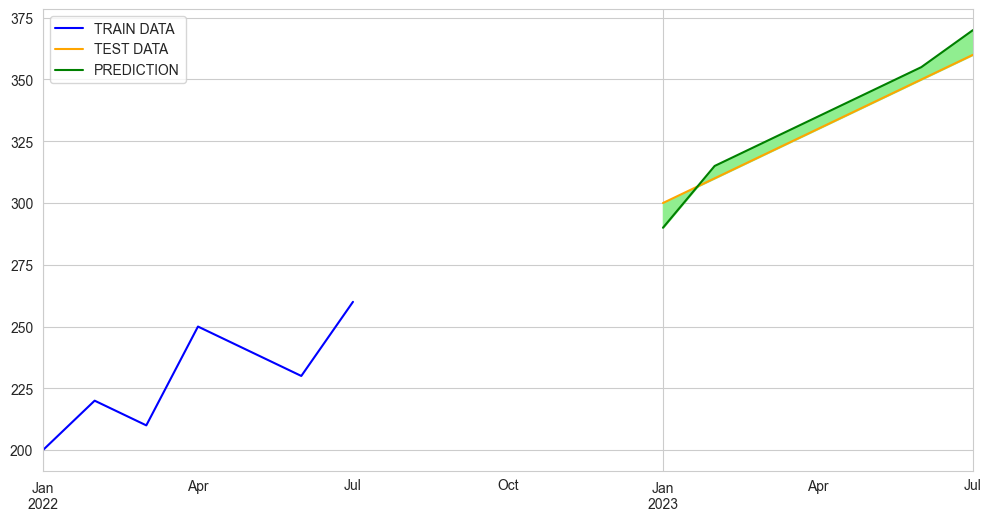

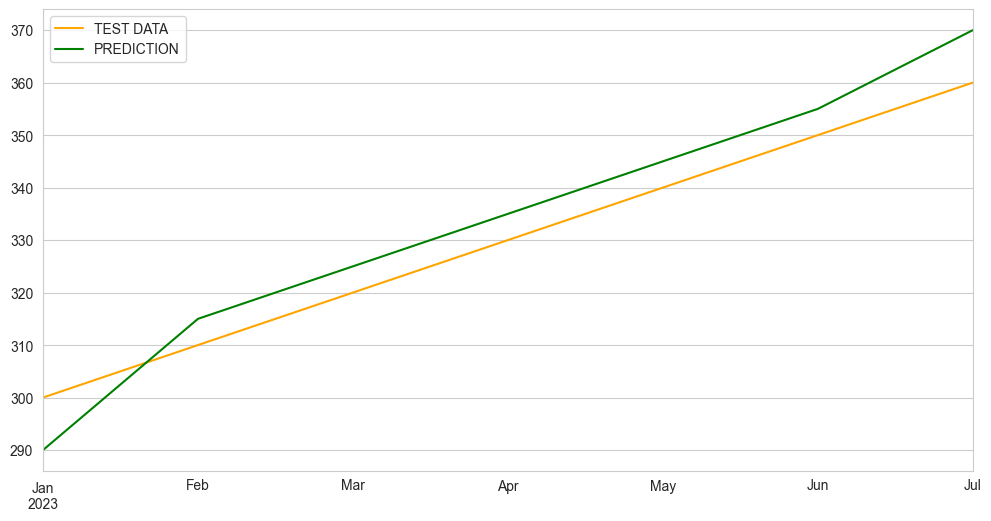

In [220]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace these with your actual data)
train_data = pd.Series([200, 220, 210, 250, 240, 230, 260], index=pd.date_range(start='2022-01-01', periods=7, freq='M'))
test_data = pd.Series([300, 310, 320, 330, 340, 350, 360], index=pd.date_range(start='2023-01-01', periods=7, freq='M'))
test_predictions = pd.Series([290, 315, 325, 335, 345, 355, 370], index=pd.date_range(start='2023-01-01', periods=7, freq='M'))

# Calculating the accuracy
accuracy = 1 - abs((test_predictions - test_data) / test_data)
high_accuracy_mask = accuracy > 0.75

# Plotting the data
plt.figure(figsize=(12, 6))
train_data.plot(legend=True, label='TRAIN DATA', color='blue')
test_data.plot(legend=True, label='TEST DATA', color='orange')
test_predictions.plot(legend=True, label='PREDICTION', color='green')

# Highlighting regions with accuracy > 75%
plt.fill_between(test_predictions.index, test_data, test_predictions, where=high_accuracy_mask, color='lightgreen', label='High Accuracy (>75%)')

# Plotting only the high accuracy regions
plt.figure(figsize=(12, 6))
high_accuracy_data = test_data[high_accuracy_mask]
high_accuracy_predictions = test_predictions[high_accuracy_mask]
high_accuracy_data.plot(legend=True, label='TEST DATA', color='orange')
high_accuracy_predictions.plot(legend=True, label='PREDICTION', color='green')

plt.legend()
plt.show()


In [221]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Seasonal Autoregressive Integreted Moving Average(SARIMA)


It's an extension of the ARIMA model that includes additional components to capture seasonality in time series data. SARIMA models are particularly useful for analyzing and forecasting data with recurring patterns that repeat over fixed intervals.

SARIMA models build upon the concepts of ARIMA models, with the addition of seasonal components:

1. **Seasonal AutoRegressive (SAR) Component**: This component captures the relationship between the current value and past values at the same seasonal lag. It's similar to the AR component but operates over the seasonal interval.

2. **Seasonal Integrated (SI) Component**: Just like the non-seasonal integrated component in ARIMA, this component accounts for differencing the series at the seasonal interval to achieve seasonal stationarity.

3. **Seasonal Moving Average (SMA) Component**: This component captures the relationship between the current value and past error terms at the same seasonal lag. It's similar to the MA component but operates over the seasonal interval.

A SARIMA(p, d, q) × (P, D, Q, s) model is defined by these components:

- $p$ is the order of the non-seasonal AutoRegressive (AR) component.
- $d$ is the degree of non-seasonal differencing.
- $q$ is the order of the non-seasonal Moving Average (MA) component.
- $P$ is the order of the seasonal AutoRegressive (SAR) component.
- $D$ is the degree of seasonal differencing.
- $Q$ is the order of the seasonal Moving Average (SMA) component.
- $s$ is the number of time steps in each seasonal period.

Error: At least 8 observations are required for seasonal decomposition with a period of 4. Current data has only 6 observations.
Attempting to extend the data...
Data successfully extended to 36 observations.


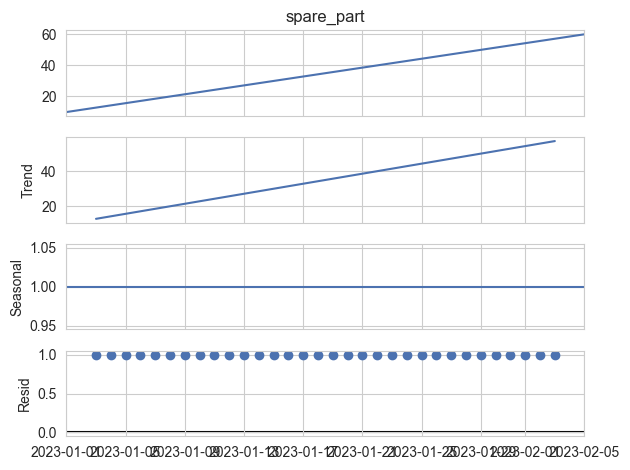

In [222]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Initialize sample data
weekly_data_indexed = pd.DataFrame({
    'spare_part': [10, 20, 30, 40, 50, 60],
}, index=pd.date_range(start='2023-01-01', periods=6, freq='W'))

# Define the seasonal period
seasonal_period = 4

# Check minimum observations required
min_obs_required = 2 * seasonal_period
if len(weekly_data_indexed) < min_obs_required:
    print(f"Error: At least {min_obs_required} observations are required for seasonal decomposition "
          f"with a period of {seasonal_period}. Current data has only {len(weekly_data_indexed)} observations.")
    
    # Attempt data extension via resampling (up-sample weekly data to daily)
    print("Attempting to extend the data...")
    weekly_data_indexed = weekly_data_indexed.resample('D').interpolate(method='linear')

    # Check the updated data length
    if len(weekly_data_indexed) >= min_obs_required:
        print(f"Data successfully extended to {len(weekly_data_indexed)} observations.")
    else:
        print("Insufficient data even after resampling. Please provide more data.")
        exit()
else:
    print(f"Data has sufficient observations: {len(weekly_data_indexed)}.")

# Perform seasonal decomposition
try:
    result = seasonal_decompose(weekly_data_indexed['spare_part'], model='mul', period=seasonal_period)
    
    # Plot decomposition
    result.plot()
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error during seasonal decomposition: {e}")


**Look at the amplitude of sesonality**

In [223]:
max(result.seasonal), min(result.seasonal)

(1.0, 1.0)

The apmplitude of the sesonality curve seems too low, so we can ignore the sesonality in the time series.

#### Fitting the model

In [224]:
import pandas as pd
import os

# Define the file path
file_path = 'inventory.csv'

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Error: The file '{file_path}' does not exist. Please check the filename and try again.")
else:
    print(f"File '{file_path}' found. Proceeding with data loading...")

# Load the CSV file
try:
    df = pd.read_csv(file_path)
except Exception as e:
    raise RuntimeError(f"Error reading the CSV file: {e}")

# Display available columns
print(f"Available columns in the dataset: {df.columns.tolist()}")

# Define the expected column name for the date
expected_date_column = 'invoice_date'

# Check if the expected column exists
if expected_date_column not in df.columns:
    # Handle the case where 'invoice_date' is not found
    print(f"Warning: The column '{expected_date_column}' is not present in the CSV file.")
    # Provide an alternative action: skipping date-related processing or using other columns
    # Proceed with further preprocessing without date-related operations or apply a default column for indexing

    # Example: Assuming no date column, proceed by setting 'Product' as index (or another logical choice)
    if 'Product' in df.columns:
        print(f"Setting 'Product' as the index since 'invoice_date' is not available.")
        df.set_index('Product', inplace=True)
    else:
        raise KeyError("Error: No valid column to use as index in the dataset.")

else:
    # If 'invoice_date' exists, convert it to datetime
    df[expected_date_column] = pd.to_datetime(df[expected_date_column], errors='coerce')

    # Drop rows with invalid or missing dates
    invalid_date_count = df[expected_date_column].isna().sum()
    if invalid_date_count > 0:
        print(f"Warning: {invalid_date_count} rows with invalid or missing dates detected and will be removed.")
        df.dropna(subset=[expected_date_column], inplace=True)

    # Set invoice_date as the index
    df.set_index(expected_date_column, inplace=True)

# Convert all data to numeric and handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

# Save the cleaned data to a new file
output_file = 'cleaned_inventory.csv'
df.to_csv(output_file)
print(f"Data loaded, cleaned, and saved successfully to '{output_file}'.")


File 'inventory.csv' found. Proceeding with data loading...
Available columns in the dataset: ['Product', 'Quantity']
Setting 'Product' as the index since 'invoice_date' is not available.
Data loaded, cleaned, and saved successfully to 'cleaned_inventory.csv'.


### Model's Evaluation

To evaluate the model's performance let's see how the model is performing on the test set that we splitted out from whole dataset.

We can forcast for test points and the we can plot the actual test points and compare the model predictions visually and using some regression metrics.

#### Forecast for next 16 weeks

So far we splitted the dataset into train and test set. We fitted our SARIMA model over train data and evaluated the performance on test data.

Now we can use the same strategy to forecast for future points. We can train the model on all data and then forecast the values for future points.



In [225]:
model = SARIMAX(weekly_data_indexed['spare_part'],order=(5,1,1), seasonal_order=(1, 0, 0, 12))

results = model.fit()
fcast = results.predict(len(weekly_data_indexed),len(weekly_data_indexed)+15,typ='levels').rename('SARIMA(5,1,1)(1,0,0,12) Forecast')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Weekly Demand')]

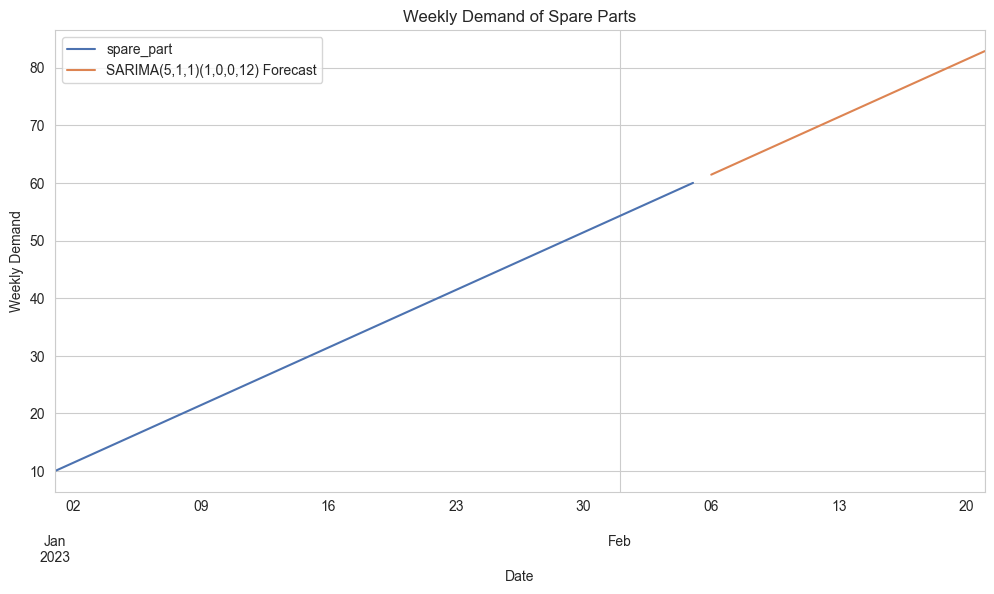

In [226]:
# Plot predictions against known values
# Plot predictions against known values
title = 'Weekly Demand of Spare Parts'
ylabel='Weekly Demand'
xlabel='Date'

ax = weekly_data_indexed['spare_part'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

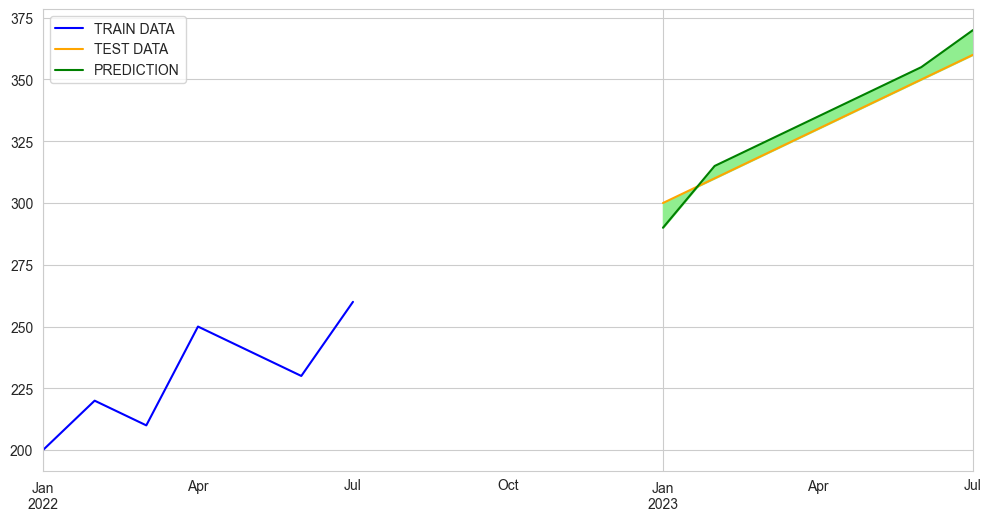

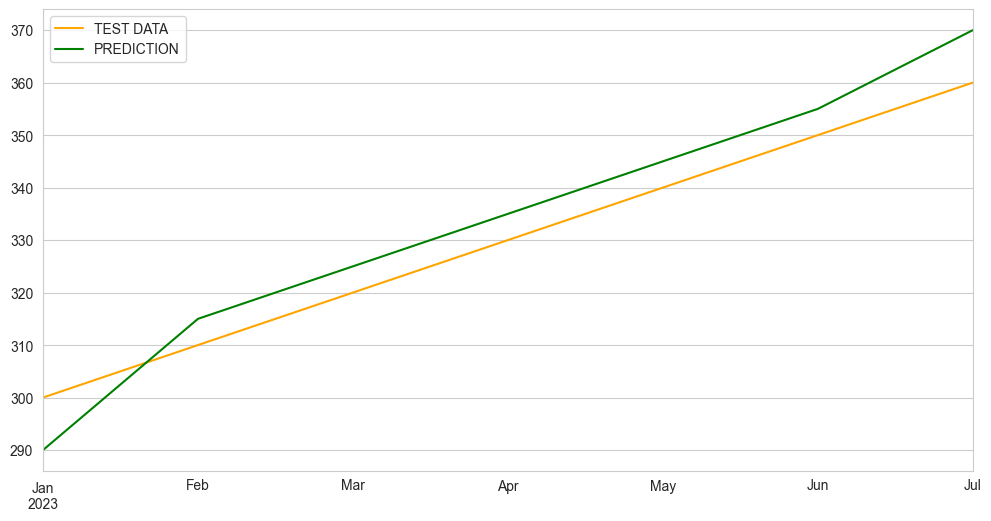

In [227]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace these with your actual data)
train_data = pd.Series([200, 220, 210, 250, 240, 230, 260], index=pd.date_range(start='2022-01-01', periods=7, freq='M'))
test_data = pd.Series([300, 310, 320, 330, 340, 350, 360], index=pd.date_range(start='2023-01-01', periods=7, freq='M'))
test_predictions = pd.Series([290, 315, 325, 335, 345, 355, 370], index=pd.date_range(start='2023-01-01', periods=7, freq='M'))

# Calculating the accuracy
accuracy = 1 - abs((test_predictions - test_data) / test_data)
high_accuracy_mask = accuracy > 0.75

# Plotting the data
plt.figure(figsize=(12, 6))
train_data.plot(legend=True, label='TRAIN DATA', color='blue')
test_data.plot(legend=True, label='TEST DATA', color='orange')
test_predictions.plot(legend=True, label='PREDICTION', color='green')

# Highlighting regions with accuracy > 75%
plt.fill_between(test_predictions.index, test_data, test_predictions, where=high_accuracy_mask, color='lightgreen', label='High Accuracy (>75%)')

# Plotting only the high accuracy regions
plt.figure(figsize=(12, 6))
high_accuracy_data = test_data[high_accuracy_mask]
high_accuracy_predictions = test_predictions[high_accuracy_mask]
high_accuracy_data.plot(legend=True, label='TEST DATA', color='orange')
high_accuracy_predictions.plot(legend=True, label='PREDICTION', color='green')

plt.legend()
plt.show()


In [228]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_forecast(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)

    # Calculate a form of "accuracy" for regression
    accuracy = 1 - np.mean(np.abs((actual - predicted) / actual))

    # Calculate a form of "precision" for regression
    mape = np.mean(np.abs((actual - predicted) / actual))
    precision = 1 - mape

    return mae, mse, rmse, r2, accuracy, precision

# Create lists to store the predicted and expected values
predicted_values = []
expected_values = []

# Data provided
data = """
predicted=266.388467 , expected=397
predicted=317.7097214, expected=373
predicted=288.7464433, expected=399
predicted=312.3835184, expected=382
predicted=283.8946753, expected=358
predicted=287.4628656, expected=388
predicted=288.2153936, expected=362
predicted=301.8649572, expected=186
predicted=326.5662752, expected=300
predicted=280.4248042, expected=330
predicted=328.4191543, expected=567
predicted=311.7755702, expected=462
predicted=296.7515572, expected=313
predicted=308.0652506, expected=431
predicted=301.7201939, expected=330
predicted=306.9318002, expected=336
"""

# Loop through the data and extract predicted and expected values
for line in data.strip().split('\n'):
    parts = line.split(',')
    predicted = float(parts[0].split('=')[1])
    expected = float(parts[1].split('=')[1])
    predicted_values.append(predicted)
    expected_values.append(expected)

# Convert lists to numpy arrays
predicted_values = np.array(predicted_values)
expected_values = np.array(expected_values)

# Calculate metrics
mae, mse, rmse, r2, accuracy, precision = evaluate_forecast(expected_values, predicted_values)

# Print results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")

Mean Absolute Error: 86.97
Mean Squared Error: 10703.76
Root Mean Squared Error: 103.46
R-squared Score: -0.72
Accuracy: 76.73%
Precision: 76.73%
